# 1. Import Packages

In [ ]:
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
from scripts.analysis_core import analyze_event
import pprint

# 2. Define Parameters and Paths

In [ ]:
# parameters
event_date = "20231001-2221"
data_path = "/home/lulu/data/inci30"
output_path = "../results"
instrument_type = "fiber"   # "fiber" or "borehole"
wave_type = "s"             # "p" or "s"
depth_pair = (100, 300)     # depth

In [2]:
# 3. Analyze

[FIBER] 100m → #1258 (misfit: 2.0m)
[FIBER] 300m → #1307 (misfit: 1.9m)
[BOREHOLE] 100m → None (misfit: 2.0m)
[BOREHOLE] 300m → None (misfit: 1.9m)
Processing Station 1...
Processed


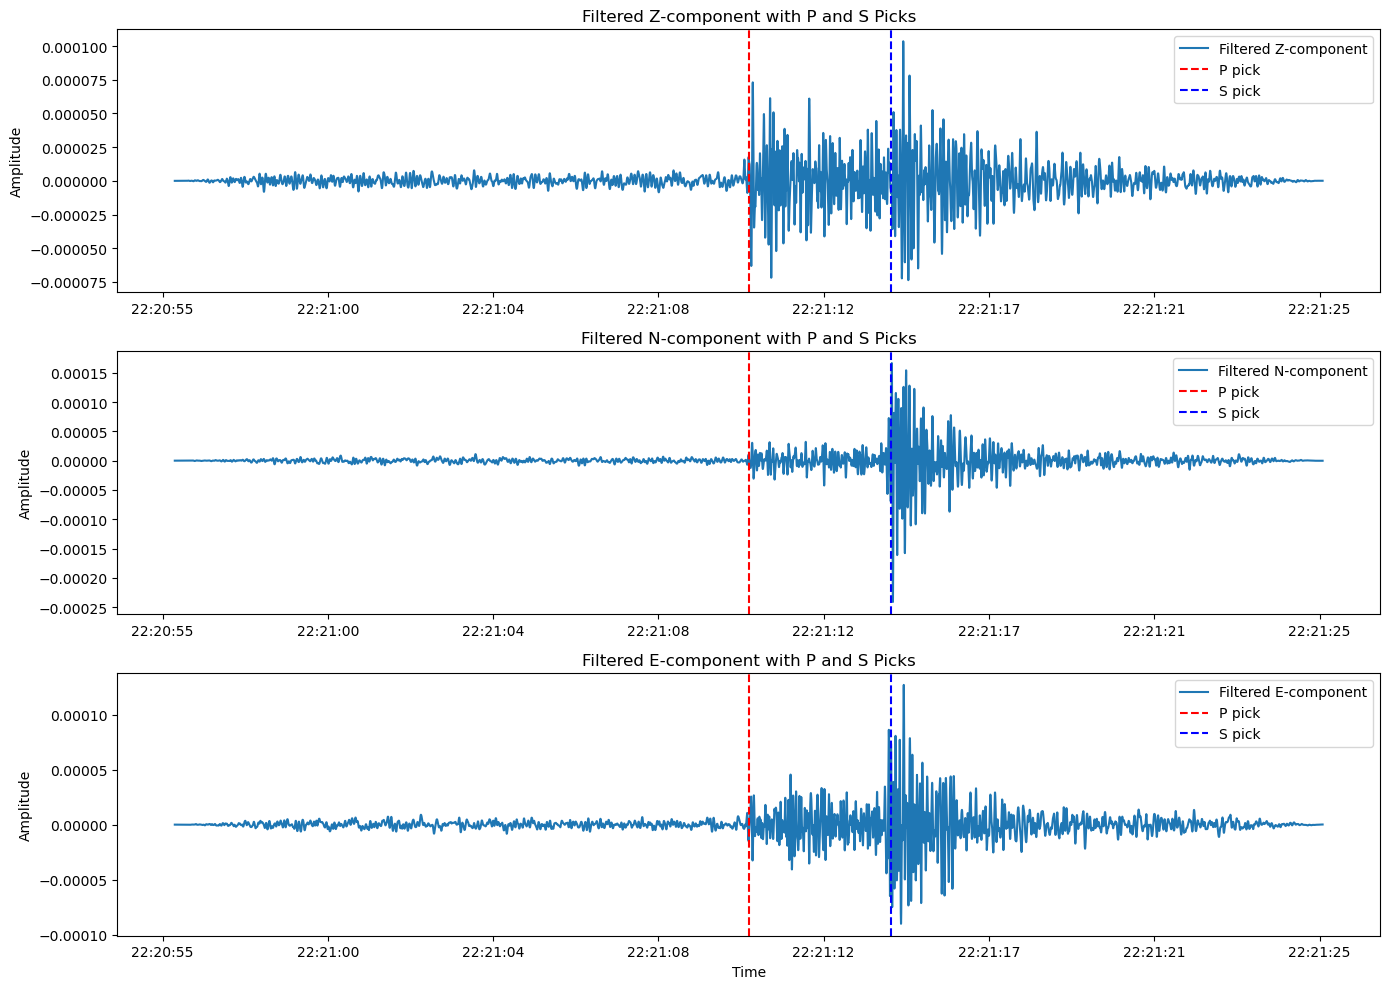

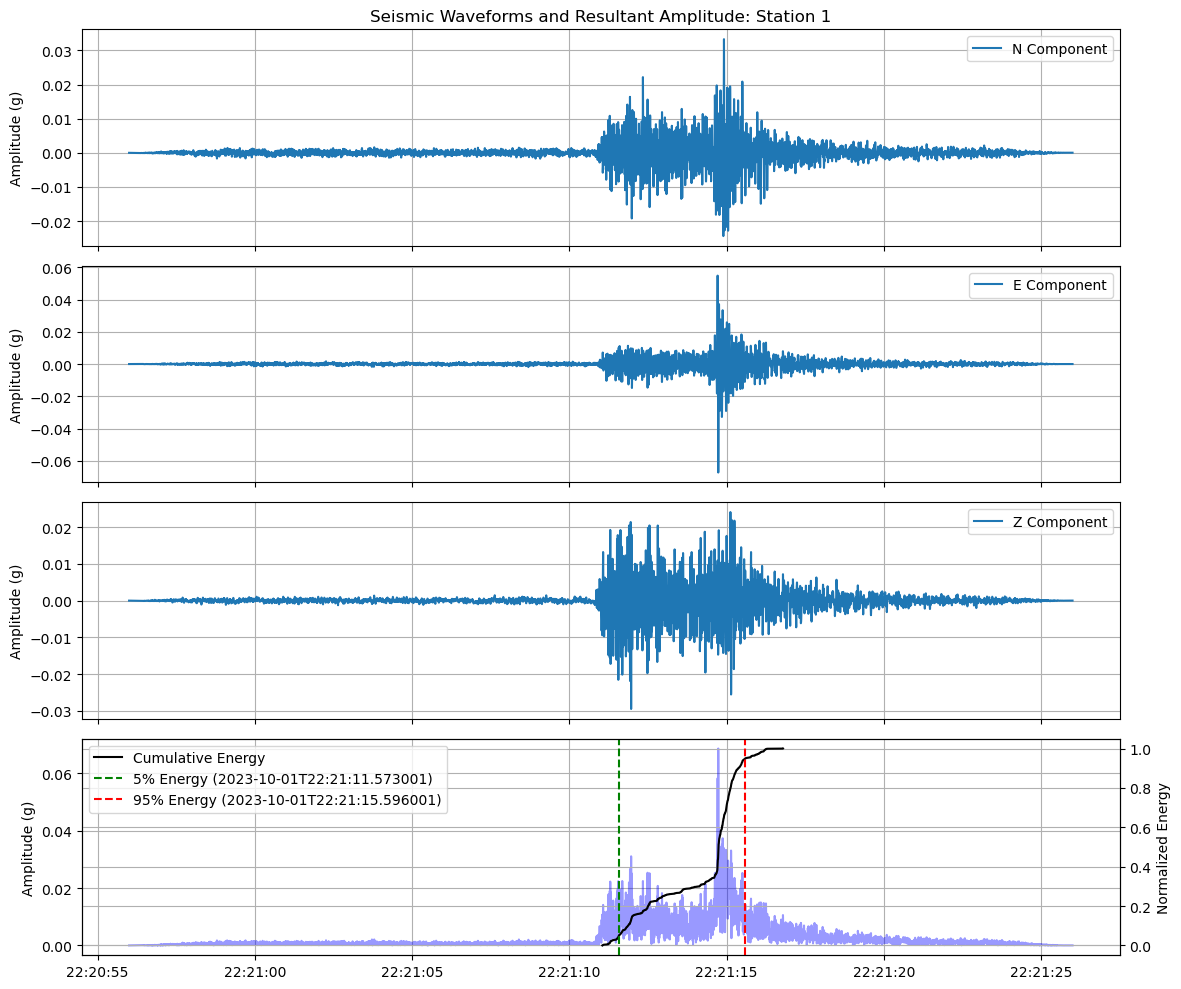

Processing Station 2...
Error processing Station 2: 'NoneType' object is not subscriptable
SNR: 0.9716
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(100, 300)


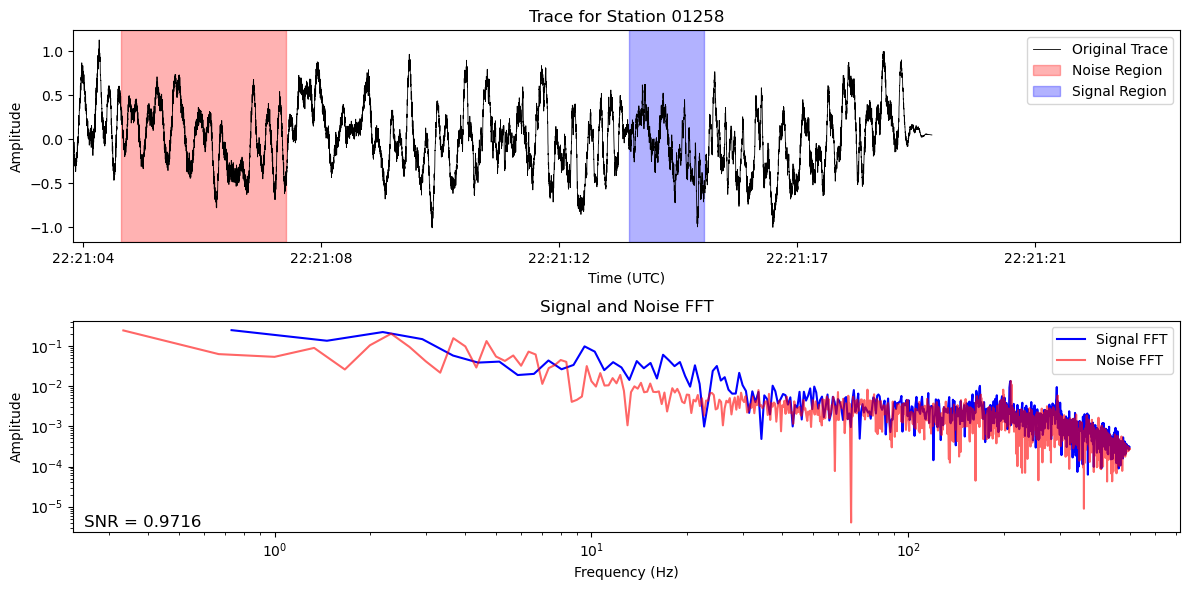

SNR: 1.5694
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(100, 300)


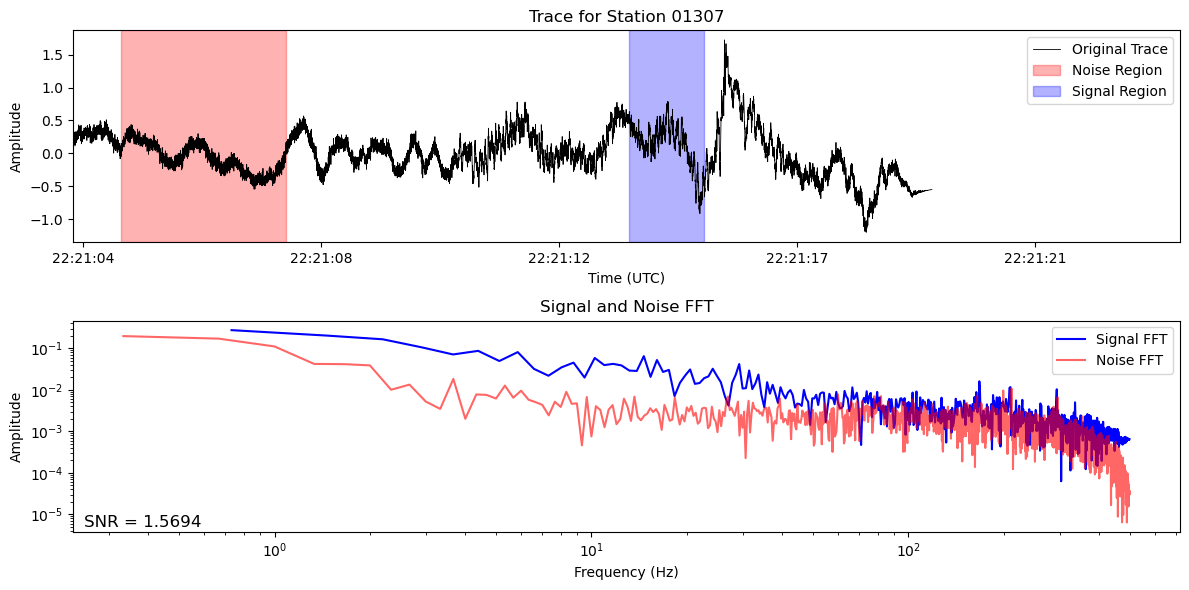

Results for Station #01258
  Fitted Omega_0: 0.003796722747006612
  Fitted f_c: 4.018880136526363
  Fitted t*: 1.1378905725643489e-19

Results for Station #01307
  Fitted Omega_0: 0.021023839516886755
  Fitted f_c: 1.617273755015615
  Fitted t*: 3.709533771733365e-21

Plot saved to ../results/20231001-2221/fiber-s/(100, 300)/omega_fit_resampled.png


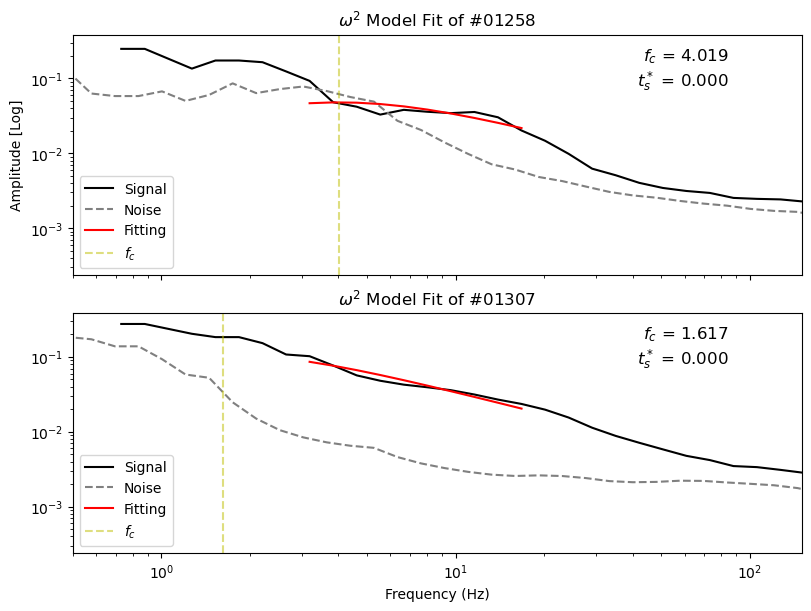

{'Q_error_neg': 6.381774371618189,
 'Q_error_ori_neg': 41.72168364659258,
 'Q_error_ori_pos': 5.831273303695127,
 'Q_error_pos': 2.8671982562257377,
 'Q_error_re_neg': 230.27595257035512,
 'Q_error_re_pos': 8.707113993568159,
 'Q_value': -10.412528708536204,
 'Q_value_ori': -10.23240427668576,
 'Q_value_re': -18.09856459858375,
 'avg_snr': 1.2704973585006365,
 'depth_pair': '(100, 300)',
 'ds': 200,
 'event_date': '20231001-2221',
 'fit_fc': 2.818076945770989,
 'instrument_type': 'fiber',
 'omega_full_png': '../results/20231001-2221/fiber-s/(100, '
                   '300)/omega_full_combined.png',
 'original_full_png': '../results/20231001-2221/fiber-s/(100, '
                      '300)/original_full.png',
 'plot_dir': '../results/20231001-2221/fiber-s/(100, 300)',
 'resample_ratio_png': '../results/20231001-2221/fiber-s/(100, '
                       '300)/resample_ratio.png',
 'station1': '1258',
 'station2': '1307',
 'ts': -0.014191831882735184,
 'ts_error': 0.005392844738081307,


In [5]:
result = analyze_event(
    event_date=event_date,
    data_path=data_path,
    output_path=output_path,
    instrument_type=instrument_type,
    wave_type=wave_type,
    depth_pair=depth_pair,
    plot=True
)


pprint.pprint(result)

print("Q (原始方法):", result['Q_value_ori'], "+", result['Q_error_ori_pos'], "-", result['Q_error_ori_neg'])
print("Q (重取樣):", result['Q_value_re'], "+", result['Q_error_re_pos'], "-", result['Q_error_re_neg'])
print("Q (omega擬合):", result['Q_value'], "+", result['Q_error_pos'], "-", result['Q_error_neg'])
print("原始法圖檔:", result.get('original_full_png'))
print("重取樣圖檔:", result.get('resample_ratio_png'))
print("omega-square圖檔:", result.get('omega_full_png'))